# Imports and Environment Check

In [1]:
import geopandas as gpd
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import contextily as ctx

# Loading Data
## Border

In [2]:
Nairobi = "../data/raw/Nairobi shapefile/Nairobi.shp"

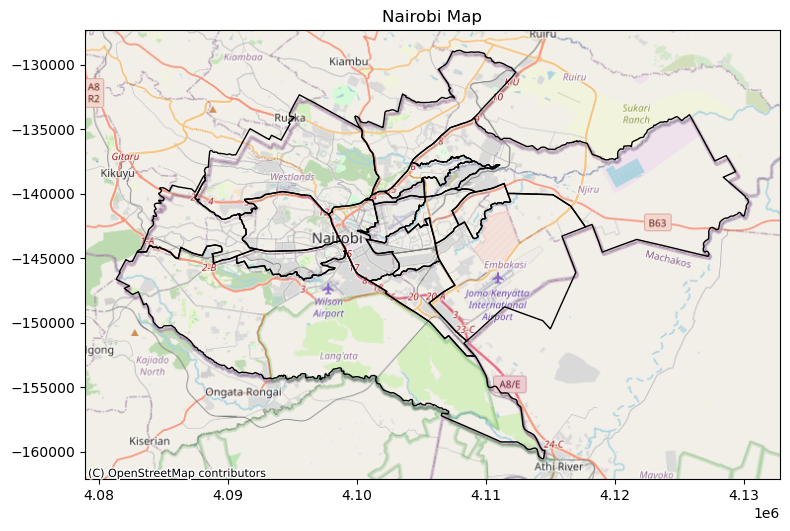

In [3]:
gdf_nairobi = gpd.read_file(Nairobi).to_crs(epsg = 3857)
ax = gdf_nairobi.plot(figsize=(8,8),edgecolor = "k", facecolor = "none")
ax.set_title("Nairobi Map")
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_nairobi.crs)
plt.tight_layout()
plt.savefig("../outputs/Nairobi.png", dpi=200)

##  Facilities